# PyTorch Intro

## Tensors

In [1]:
import torch
import numpy 

In [2]:
numpy.array([[0.1, 1.2], [2.2, 3.1], [4.9, 5.2]])

array([[0.1, 1.2],
       [2.2, 3.1],
       [4.9, 5.2]])

In [3]:
torch.tensor([[0.1, 1.2], [2.2, 3.1], [4.9, 5.2]])

tensor([[0.1000, 1.2000],
        [2.2000, 3.1000],
        [4.9000, 5.2000]])

In [4]:
w = torch.empty(3, 3)
print(w,'\n', w.shape, '\n')

tensor([[5.0840e-37, 1.4013e-45, 5.0962e-37],
        [1.4013e-45, 0.0000e+00, 4.6566e-10],
        [6.3479e+12, 3.6902e+19, 1.1571e-38]]) 
 torch.Size([3, 3]) 



In [5]:
x = torch.randn(3, 3, 7)
print(x,'\n', x.shape, '\n')

tensor([[[ 3.2582e-04,  8.9048e-01,  2.7812e-01, -1.3834e+00,  1.5269e+00,
          -1.8949e-01, -2.6646e+00],
         [-1.1075e+00, -2.5119e+00, -1.9347e+00,  7.8902e-01,  1.7050e-01,
           8.0616e-01, -4.8775e-01],
         [ 1.7073e+00, -4.6947e-01, -3.0276e-01, -3.8050e-02, -8.3227e-01,
          -8.5200e-01, -1.9580e+00]],

        [[ 8.5239e-01,  5.1725e-01,  5.8629e-01,  1.9032e+00, -3.1129e-01,
           2.2456e-01,  6.4807e-01],
         [ 7.7014e-01,  1.7855e-01, -8.7985e-01,  1.8048e-01, -2.9490e-01,
           1.0022e-01, -4.7015e-01],
         [ 2.6078e-01, -1.4962e+00,  2.6233e-01, -1.3797e+00,  4.6124e-01,
          -9.5407e-01, -8.4457e-01]],

        [[ 1.9652e+00,  2.1839e-01, -1.1005e+00,  1.2854e-01,  4.9538e-01,
           6.7895e-01, -8.3334e-01],
         [-2.2411e-01, -9.2231e-01,  1.9939e+00, -1.3030e+00, -7.0058e-01,
           8.7591e-01,  2.6500e-01],
         [ 6.4533e-01, -2.7089e-01, -5.4857e-01, -4.0479e-01,  6.7704e-01,
           7.8164e-01,  2

In [6]:
y = torch.zeros(3, 3)
print(y,'\n', y.shape, '\n')

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]) 
 torch.Size([3, 3]) 



In [7]:
z = torch.ones(3, 3)
print(z,'\n', z.shape, '\n')

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) 
 torch.Size([3, 3]) 



## Shape and View


In [8]:
x = torch.rand(100,50)
print(x.shape)

torch.Size([100, 50])


In [9]:
y=x.view(20,5,50)
print(y.shape)

torch.Size([20, 5, 50])


In [10]:
z=x.view(-1,5,50)
print(z.shape)

torch.Size([20, 5, 50])


# Tensors in CPU and GPU

In [13]:
cpu=torch.device("cpu")
# gpu=torch.device("cuda:0") # GPU 0

# Create tensor with CPU
x=torch.ones(3,3, device=cpu)
print("CPU:",x.device)

# x=torch.ones(3,3, device=gpu)
# print("GPU:",x.device)

# x=torch.ones(3,3).cuda(0)
# print("CPU to GPU:",x.device)

# x=torch.ones(3,3, device=gpu).cpu()
# print("GPU to CPU:",x.device)

CPU: cpu


In [14]:
x=torch.rand(10000,10000)
y=torch.rand(10000,10000)

Time in CPU

In [15]:
import time 

t = time.time()
z=x@y
t = time.time()-t
print(t)

17.082894802093506


Time in GPU

In [ ]:
# xc=x.cuda(0)
# yc=y.cuda(0)
# t = time.time()
# z=xc@yc
# t = time.time()-t
# print(t)

# Numpy to PyTorch

In [16]:
a = np.ones(5)
b = torch.from_numpy(a)
print('a:',a)
print('b:',b)

a: [1. 1. 1. 1. 1.]
b: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


# Autograd

In [17]:
x = torch.arange(4.).view(4,1)
x.requires_grad=True
print('x^T =',x.t())

y=0.5*x.t()@x

y.backward()
x.grad

x^T = tensor([[0., 1., 2., 3.]], grad_fn=<TBackward0>)


tensor([[0.],
        [1.],
        [2.],
        [3.]])

# Example

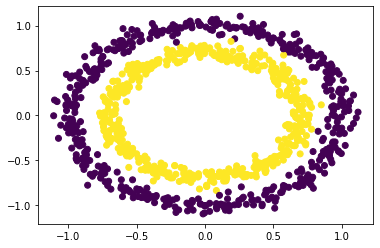

In [18]:
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
dat, lbs = datasets.make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=True, factor=0.7)

plt.scatter(dat[:,0], dat[:,1], c=lbs)

In [20]:
import torch.nn as nn
import torch.nn.functional as F

#Subclassing nn.Module
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1=nn.Linear(2,100)
        self.fc2=nn.Linear(100,2)

    def forward(self, x):
      
        x=F.relu(self.fc1(x))
        x=self.fc2(x)
        return F.softmax(x, dim=1)
    
net=Net()

net

Net(
  (fc1): Linear(in_features=2, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=2, bias=True)
)

In [24]:
#Split into training and test set
torch.set_default_dtype(torch.float32)
# input=torch.tensor(dat, dtype=torch.float32).cuda()
input=torch.tensor(dat, dtype=torch.float32)
train = input[:800]
# lab_train=torch.tensor(lbs[:800]).cuda()
lab_train=torch.tensor(lbs[:800])


test  = input[800:]
# lab_test =torch.tensor(lbs[800:]).cuda()
lab_test =torch.tensor(lbs[800:])

#Split the training and test set into batches

train = train.view(-1,10,2)
lab_train=lab_train.view(-1,10)
test  = test.view(-1,2)
lab_test=lab_test

print("Train shape:", train.shape)
print("test shape: ", test.shape)

Train shape: torch.Size([80, 10, 2])
test shape:  torch.Size([200, 2])


In [25]:
import torch.optim as optim

#Define loss function
criterion = nn.CrossEntropyLoss()

#Use stochastic gradient descent to optimize the function
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#Training
for epoch in range(20):

    loss_promedio = 0.0
    for i, data in enumerate(zip(train, lab_train)):
        inputs, labels = data
        
        # Set the gradient in zero to clear the gradient in the last iteration
        optimizer.zero_grad()

        # Feed the inputs to the neural network
        outputs = net(inputs)
        
        # Calculation the loss
        loss = criterion(outputs, labels)

        # Backpropagation to calculate the gradient
        loss.backward()

        # Apply stochastic gradient descent to minimize the loss
        optimizer.step()

        # Show the average loss for every 10 iterations
        loss_promedio += loss.item()
        if i % 10 == 9:
            print('Epoch : %d\t  Batch: %d\t loss: %.3f' %(epoch + 1, i + 1, loss_promedio / 10))
            
            loss_promedio = 0.001

Epoch : 1	  Batch: 10	 loss: 0.683
Epoch : 1	  Batch: 20	 loss: 0.691
Epoch : 1	  Batch: 30	 loss: 0.684
Epoch : 1	  Batch: 40	 loss: 0.687
Epoch : 1	  Batch: 50	 loss: 0.679
Epoch : 1	  Batch: 60	 loss: 0.687
Epoch : 1	  Batch: 70	 loss: 0.688
Epoch : 1	  Batch: 80	 loss: 0.682
Epoch : 2	  Batch: 10	 loss: 0.681
Epoch : 2	  Batch: 20	 loss: 0.688
Epoch : 2	  Batch: 30	 loss: 0.678
Epoch : 2	  Batch: 40	 loss: 0.683
Epoch : 2	  Batch: 50	 loss: 0.675
Epoch : 2	  Batch: 60	 loss: 0.685
Epoch : 2	  Batch: 70	 loss: 0.684
Epoch : 2	  Batch: 80	 loss: 0.678
Epoch : 3	  Batch: 10	 loss: 0.678
Epoch : 3	  Batch: 20	 loss: 0.685
Epoch : 3	  Batch: 30	 loss: 0.675
Epoch : 3	  Batch: 40	 loss: 0.680
Epoch : 3	  Batch: 50	 loss: 0.672
Epoch : 3	  Batch: 60	 loss: 0.681
Epoch : 3	  Batch: 70	 loss: 0.680
Epoch : 3	  Batch: 80	 loss: 0.674
Epoch : 4	  Batch: 10	 loss: 0.675
Epoch : 4	  Batch: 20	 loss: 0.681
Epoch : 4	  Batch: 30	 loss: 0.671
Epoch : 4	  Batch: 40	 loss: 0.676
Epoch : 4	  Batch: 5

In [26]:
outputs=net(test)

# Choose the prediction with higher probability
_, predicted = torch.max(outputs, 1)

# Find the average accuracy of all the examples in the test
acc=(lab_test==predicted).sum().double()/200
print("Test accuracy:",acc.item())

Test accuracy: 0.995
